In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


## Extract the samples from all files

In [3]:
samples = {}
methods = ["binary", "ohe", "unary", "domain_wall"]

for method in methods:

    # iterate over different size
    for filename in os.listdir(f"{method}/"):
        if filename.startswith("solutions_"):

            # load the data
            data = np.load(f"{method}/{filename}", allow_pickle=True)
            
            # iterate over each trial which has different penalty weights
            for trial in data:

                # extract the penalty weights
                weights = tuple(trial["penalty_weights"].values())
                
                # extract the solutions
                solutions = trial["solutions"]

                sample_array = []

                for sample in solutions:
                    
                    # store the energy
                    sample_array.append(sample["sample"])

                

                if method in list(samples.keys()):
                    if filename in list(samples[method].keys()):
                        # if the filename already exists, append the energy array
                        samples[method][filename].setdefault(weights, sample_array)
                    else:
                        # if the filename does not exist, create a new entry
                        samples[method].setdefault(filename, {weights: sample_array})
                else:
                    samples.setdefault(method, {filename: {weights: sample_array}})

## Convert the samples to a magic square count

#### Domain Wall

In [4]:
def domain_wall_to_decimal(item):
    if [1] * item.count(1) + [0] * item.count(0) == item:
        return sum(item)
    return -1

def domain_wall_get_grid(sample):
    grid = np.zeros((len(sample), len(sample)))
    
    for i in range(len(sample)):
        for j in range(len(sample)):

            # get the item
            item = list(sample[i][j])
            
            grid[i][j] = domain_wall_to_decimal(item)
            
    return np.array(grid)

def check_domain_wall(sample):

    count = 0
    for i in range(len(sample)):
        for j in range(len(sample)):
            item = list(map(int, sample[i][j]))
            
            if [1] * item.count(1) + [0] * item.count(0) != item:
                count += 1

    if count == 0:
        return True
    
    return count

def check_domain_wall_unique(sample):
    grid = domain_wall_get_grid(sample)

    if len(set(grid.flatten())) == len(sample) * len(sample):
        return True
    return False

def check_domain_wall_sum_col(sample):

    # get grid and sum cols
    grid = domain_wall_get_grid(sample)
    sums = [int(sum(grid[:,i])) for i in range(len(sample))]

    # test for equality
    if len(set(sums)) == 1:
        return True
    return False

def check_domain_wall_sum_row(sample):
    
    # get grid and sum rows
    grid = domain_wall_get_grid(sample)
    sums = [int(sum(grid[i,:])) for i in range(len(sample))]

    # test for equality
    if len(set(sums)) == 1:
        return True
    return False

def is_domain_wall_magic(sample):
    return check_domain_wall(sample) and check_domain_wall_unique(sample) and check_domain_wall_sum_col(sample) and check_domain_wall_sum_row(sample)

#### One Hot Encoding

In [5]:
def ohe_to_decimal(item):
    if sum(item) == 1:
        return item.index(1) + 1
    else:
        return -1

def ohe_get_grid(sample):
    grid = np.zeros((len(sample), len(sample)))
    
    for i in range(len(sample)):
        for j in range(len(sample)):

            # get the item
            item = list(sample[i][j])
            
            grid[i][j] = ohe_to_decimal(item)
            
    return np.array(grid)

def check_ohe(sample):
    
    count = 0

    # count how many samples are not one hot encoded
    for i in range(len(sample)):
        for j in range(len(sample)):
            if sum(sample[i][j]) != 1:
                count += 1

    # return the number of samples that are not one hot encoded
    if count > 0:
        return count

    # return True if all samples are one hot encoded
    return True

def check_ohe_unique(sample):
    grid = ohe_get_grid(sample)

    if len(set(grid.flatten())) == len(sample) * len(sample):
        return True
    return False

def check_ohe_sum_col(sample):

    # get grid and sum cols
    grid = ohe_get_grid(sample)
    sums = [int(sum(grid[:,i])) for i in range(len(sample))]

    # test for equality
    if len(set(sums)) == 1:
        return True
    return False

def check_ohe_sum_row(sample):
    
    # get grid and sum rows
    grid = ohe_get_grid(sample)
    sums = [int(sum(grid[i,:])) for i in range(len(sample))]

    # test for equality
    if len(set(sums)) == 1:
        return True
    return False

def is_ohe_magic(sample):
    return check_ohe(sample) and check_ohe_unique(sample) and check_ohe_sum_col(sample) and check_ohe_sum_row(sample)

#### Binary

In [ ]:
# space for binary 

In [6]:

correct_samples = {}

for method in list(samples.keys()):
    for filename in list(samples[method].keys()):
        for weight_configuration in list(samples[method][filename].keys()):
            
            data = samples[method][filename]
            sample_array = data[weight_configuration]

            unique_count = 0
            format_count = 0
            col_count = 0
            row_count = 0
            magic_count = 0
            
            

            # iterate over each sample
            for sample in sample_array:
                
                if method == "domain_wall":
                    if check_domain_wall_unique(sample):
                        unique_count += 1
                    if check_domain_wall_sum_col(sample):
                        col_count += 1
                    if check_domain_wall_sum_row(sample):
                        row_count += 1
                    if check_domain_wall(sample):
                        format_count += 1
                    if is_domain_wall_magic(sample):
                        magic_count += 1

                if method == "ohe":
                    if check_ohe_unique(sample):
                        unique_count += 1
                    if check_ohe_sum_col(sample):
                        col_count += 1
                    if check_ohe_sum_row(sample):
                        row_count += 1
                    if check_ohe(sample):
                        format_count += 1
                    if is_ohe_magic(sample):
                        magic_count += 1

            if method in correct_samples:
                if filename in correct_samples[method]:
                    correct_samples[method][filename].setdefault(weight_configuration, {"unique": unique_count, "col_sum": col_count, "row_sum": row_count, "format": format_count, "magic": magic_count})
                else:
                    correct_samples[method].setdefault(filename, {weight_configuration: {"unique": unique_count, "col_sum": col_count, "row_sum": row_count, "format": format_count, "magic": magic_count}})
                    
            else:
                correct_samples.setdefault(method, {filename: {weight_configuration: {"unique": unique_count, "col_sum": col_count, "row_sum": row_count, "format": format_count, "magic": magic_count}}})

In [7]:
list(correct_samples["domain_wall"].keys())

['solutions_4.npy', 'solutions_3.npy', 'solutions_5.npy']

## Find the Top 10 Weight configurations based on the number of magic squares produced

In [42]:
a = sorted(correct_samples["domain_wall"]["solutions_5.npy"], key=lambda x: correct_samples["domain_wall"]["solutions_5.npy"][x]["unique"] + correct_samples["domain_wall"]["solutions_5.npy"][x]["row_sum"] + correct_samples["domain_wall"]["solutions_5.npy"][x]["col_sum"], reverse=True)
for i in a:
    print(i, correct_samples["domain_wall"]["solutions_5.npy"][i]) 


(1, 1, 1, 4) {'unique': 0, 'col_sum': 10, 'row_sum': 10, 'format': 10, 'magic': 0}
(1, 1, 2, 3) {'unique': 0, 'col_sum': 10, 'row_sum': 10, 'format': 10, 'magic': 0}
(1, 1, 3, 3) {'unique': 0, 'col_sum': 10, 'row_sum': 10, 'format': 10, 'magic': 0}
(1, 1, 3, 4) {'unique': 0, 'col_sum': 10, 'row_sum': 10, 'format': 10, 'magic': 0}
(1, 1, 4, 1) {'unique': 0, 'col_sum': 10, 'row_sum': 10, 'format': 10, 'magic': 0}
(1, 1, 4, 2) {'unique': 0, 'col_sum': 10, 'row_sum': 10, 'format': 10, 'magic': 0}
(1, 1, 4, 3) {'unique': 0, 'col_sum': 10, 'row_sum': 10, 'format': 10, 'magic': 0}
(1, 1, 4, 4) {'unique': 0, 'col_sum': 10, 'row_sum': 10, 'format': 10, 'magic': 0}
(1, 1, 1, 3) {'unique': 0, 'col_sum': 9, 'row_sum': 9, 'format': 10, 'magic': 0}
(1, 1, 2, 1) {'unique': 0, 'col_sum': 9, 'row_sum': 9, 'format': 10, 'magic': 0}
(1, 1, 2, 2) {'unique': 0, 'col_sum': 9, 'row_sum': 9, 'format': 10, 'magic': 0}
(1, 1, 2, 4) {'unique': 0, 'col_sum': 9, 'row_sum': 9, 'format': 10, 'magic': 0}
(1, 1, 3, 1)

In [8]:
# select 10 best penalty pairings
correct_samples_sorted = {}

for method in list(correct_samples.keys()):
    for filename in list(correct_samples[method].keys()):

        data = correct_samples[method][filename]
        
        # sort the energy values by the minimum energy produced
        correct_samples_new = sorted(correct_samples[method][filename], key=lambda x: data[x]["magic"], reverse=True)[:10]
        

        # add the found penalty pairings to the sorted dictionary
        for i in correct_samples_new:
            if method in list(correct_samples_sorted.keys()):
                if filename in list(correct_samples_sorted[method].keys()):
                    # if the filename already exists, append the energy array
                    correct_samples_sorted[method][filename].setdefault(i, correct_samples[method][filename][i])
                else:
                    # if the filename does not exist, create a new entry
                    correct_samples_sorted[method].setdefault(filename, {i: correct_samples[method][filename][i]})
            else:
                # if the filename does not exist, create a new entry
                correct_samples_sorted.setdefault(method, {filename: {i: correct_samples[method][filename][i]}})

## Scatter Plot

In [24]:
method = "domain_wall"
filename = "solutions_5.npy"

data = np.load(f"{method}/{filename}", allow_pickle=True)
number_of_trials = data[0]["samples"]

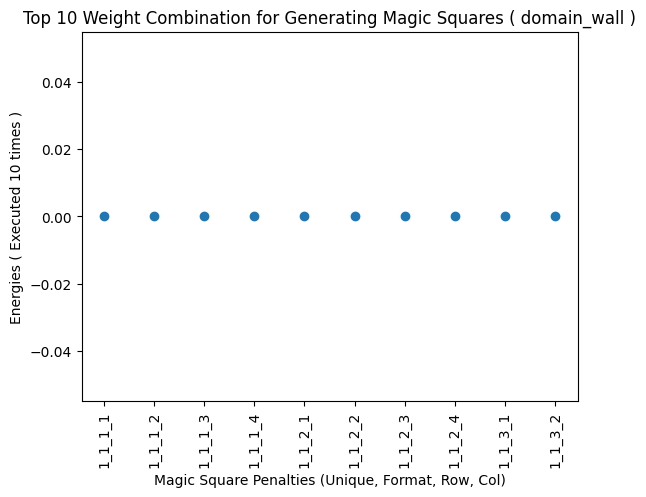

In [25]:
x = [f"{x[0]}_{x[1]}_{x[2]}_{x[3]}" for x in correct_samples_sorted[method][filename].keys()]
y = list([i["magic"] for i in correct_samples_sorted[method][filename].values()])

plt.title(f"Top 10 Weight Combination for Generating Magic Squares ( {method} )")
plt.xlabel("Magic Square Penalties (Unique, Format, Row, Col)")
plt.ylabel(f"Energies ( Executed {number_of_trials} times )")


plt.scatter(x, y)
plt.xticks(rotation=90)
plt.show()

## Take a look at the magic squares generated between different orders

In [11]:
orders = [ "solutions_4.npy"]
condensed_magic_squares = {}

for order in orders:
    for method in samples.keys():
        if order in samples[method]:
            # print(f"{samples[method][order]}")
            for weights, solutions in samples[method][order].items():
                for square in solutions:
                    if method == "domain_wall":
                        if is_domain_wall_magic(square):

                            # get the grid
                            grid = tuple([tuple(i) for i in domain_wall_get_grid(square)])

                            # add count to dictionary
                            if method not in condensed_magic_squares:
                                condensed_magic_squares.setdefault(method, {grid: 1})
                            else:
                                if grid not in condensed_magic_squares[method]:
                                    condensed_magic_squares[method].setdefault(grid, 1)
                                else:
                                    condensed_magic_squares[method][grid] += 1

                    if method == "ohe":
                        if is_ohe_magic(square):

                            # get the grid
                            grid = tuple([tuple(i) for i in ohe_get_grid(square)])

                            # add count to dictionary
                            if method not in condensed_magic_squares:
                                condensed_magic_squares.setdefault(method, {grid: 1})
                            else:
                                if grid not in condensed_magic_squares[method]:
                                    condensed_magic_squares[method].setdefault(grid, 1)
                                else:
                                    condensed_magic_squares[method][grid] += 1

In [12]:
for method in condensed_magic_squares.keys():
    print(f"{method} : {len(condensed_magic_squares[method])} unique magic squares")
    for grid, count in condensed_magic_squares[method].items():
        for row in grid:
            for element in row:
                print(int(element), end=" ")

            print()
        print(f" {count}\n")